In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
from sklearn.linear_model import LinearRegression
folder = os.getcwd() + '/'

# 4.3 ANOVA - solution

## 4.3.1 Task 3

Open the data file traffic_duration.csv. It contains data concerning how people travel to their work, what browser they use and how long they commute. 
- Does the way people commute explain the time they commute. Construct this model and comment.
- Does the browser people use explain the time they commute. Construct this model and comment.
- Which of the two models is the best?

## 4.3.2 Solution

### 4.3.2.1 Import data and take a first look

In [3]:
traffic = pd.read_csv(folder + 'data/traffic_duration.csv', index_col = 0)

In [6]:
traffic.sample(30)

,minutes,trans,browser
370,82.246642,bike/foot,edge
175,68.752895,car,edge
253,65.193069,car,chrome
70,62.334344,public transport,safari
107,64.443533,public transport,safari
247,68.472645,public transport,edge
494,50.358795,bike/foot,safari
7,80.496645,car,safari
208,67.298564,public transport,edge
431,54.398089,car,chrome


In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 1 to 521
Data columns (total 3 columns):
minutes    521 non-null float64
trans      521 non-null object
browser    521 non-null object
dtypes: float64(1), object(2)
memory usage: 16.3+ KB


In [8]:
traffic.describe()

,minutes
count,521.000000
mean,64.268464
std,12.795750
min,29.442305
25%,54.398089
50%,64.873609
75%,73.338577
max,96.241976


In [9]:
traffic.trans.unique()

array(['bike/foot', 'car', 'public transport'], dtype=object)

In [11]:
traffic["browser"].unique()

array(['safari', 'edge', 'chrome'], dtype=object)

In [12]:
traffic.trans.value_counts()

public transport    181
bike/foot           174
car                 166
Name: trans, dtype: int64

In [4]:
traffic["trans"].value_counts()

public transport    181
bike/foot           174
car                 166
Name: trans, dtype: int64

In [13]:
traffic["browser"].value_counts()

edge      200
chrome    165
safari    156
Name: browser, dtype: int64

### 4.3.2.2 ANOVA

#### Transport method

In [14]:
#Does the way people commute explain the time they commute. Construct this model and comment.
t_car = traffic.loc[traffic['trans'] == 'car'].minutes
t_bikefoot = traffic.loc[traffic['trans'] == 'bike/foot'].minutes
t_publictransport = traffic.loc[traffic['trans'] == 'public transport'].minutes

In [15]:
print(t_car.describe())
print(t_bikefoot.describe())
print(t_publictransport.describe())

count    166.000000
mean      71.112749
std       11.467023
min       43.385634
25%       64.444283
50%       71.886048
75%       79.550364
max       96.241976
Name: minutes, dtype: float64
count    174.000000
mean      59.275814
std       12.318387
min       29.442305
25%       50.431506
50%       59.288879
75%       67.972062
max       89.784890
Name: minutes, dtype: float64
count    181.000000
mean      62.790948
std       11.710389
min       32.183227
25%       54.614259
50%       62.813974
75%       71.753704
max       92.672345
Name: minutes, dtype: float64


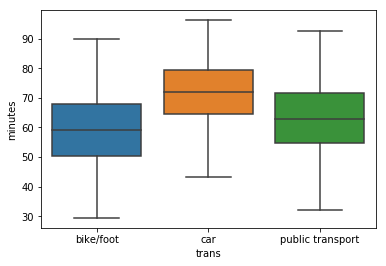

In [16]:
sns.boxplot(y='minutes', x='trans', data=traffic)

In [17]:
stats.f_oneway(t_car, t_bikefoot, t_publictransport)

F_onewayResult(statistic=44.60447405972009, pvalue=1.3391325972543461e-18)

#### Browser

In [18]:
traffic.browser.unique()

array(['safari', 'edge', 'chrome'], dtype=object)

In [19]:
#Does the browser people use explain the time they commute. Construct this model and comment.
b_chrome = traffic.loc[traffic['browser'] == 'chrome'].minutes
b_edge = traffic.loc[traffic['browser'] == 'edge'].minutes
b_safari = traffic.loc[traffic['browser'] == 'safari'].minutes

In [20]:
print(b_chrome.describe())
print(b_edge.describe())
print(b_safari.describe())

count    165.000000
mean      64.694826
std       12.051714
min       34.667482
25%       57.018309
50%       65.193069
75%       72.181517
max       96.241976
Name: minutes, dtype: float64
count    200.000000
mean      63.332624
std       13.082036
min       29.442305
25%       54.100754
50%       64.283533
75%       72.191300
max       94.251616
Name: minutes, dtype: float64
count    156.000000
mean      65.017300
std       13.191108
min       35.601804
25%       52.858739
50%       66.631119
75%       74.791556
max       92.786531
Name: minutes, dtype: float64


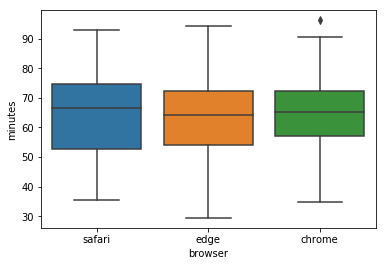

In [21]:
sns.boxplot(y='minutes', x='browser', data=traffic)

In [22]:
stats.f_oneway(b_chrome, b_edge, b_safari)

F_onewayResult(statistic=0.8932673499181751, pvalue=0.4099457341328686)

Transport method has a low p-value, so explains the data. brower type does not.